# SVM

### Setup

In [67]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import random
import os

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVC
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

In [68]:
# setting a random seed for reproducibility
random.seed(4)

# number of iterations for alg that takes iterations
ITERCOUNT = 100000

## COLAB Setup

In [69]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [70]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'realAccountData.json', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'LICENSE', 'fakeAccountData.json', 'README.md', 'SVM.ipynb']


In [71]:

with open(f'{GOOGLE_DRIVE_PATH}realAccountData.json', 'r') as f:
            realData = json.load(f)
with open(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData
random.shuffle(allData)

## SVM

In [72]:
allData_df = pd.DataFrame(allData)

allData_df.insert(0, 'Ones', 1)
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1]
Y = allData_df.iloc[:,cols-1:cols]

display(allData_df)

,Ones,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,1,65,67,79,116,1,0,0,8,0
1,1,219,337,0,0,1,1,1,7,0
2,1,252,509,0,28,1,1,0,11,0
3,1,58,2132,0,0,0,0,0,14,1
4,1,452,481,0,82,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...
1189,1,234,658,93,2,1,0,0,14,0
1190,1,846,743,22,38,1,0,0,12,0
1191,1,384,219,51,11,1,1,0,12,0
1192,1,323,405,0,69,1,1,0,10,0


In [73]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=4)

## Training the SVM

In [74]:
y_train_array = np.ravel(y_train)

svm = SVC(random_state=4, max_iter=ITERCOUNT, kernel="poly").fit(x_train, y_train_array)

svm.score(x_test, y_test)

0.9331103678929766

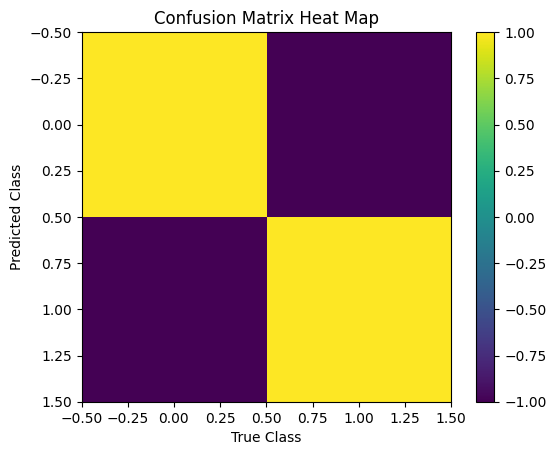

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       246
           1       0.92      0.68      0.78        53

    accuracy                           0.93       299
   macro avg       0.93      0.83      0.87       299
weighted avg       0.93      0.93      0.93       299



In [75]:
y_test_array = np.ravel(y_test)
svm_pred = svm.predict(X = x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svm_pred)
conf_matrix_scaler = preprocessing.StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)

plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

svm_report = classification_report(y_true = y_test, y_pred = svm_pred)
print(svm_report)



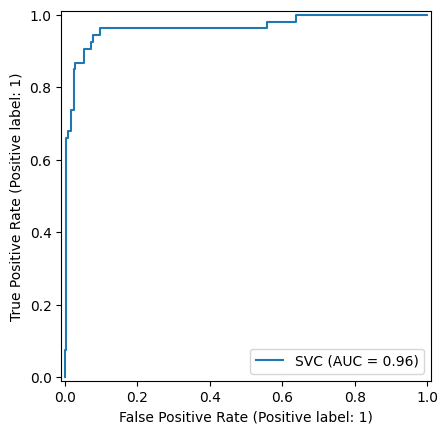

In [76]:
from sklearn.metrics import RocCurveDisplay
svm_roc_disp = RocCurveDisplay.from_estimator(svm, x_test, y_test)
plt.show()

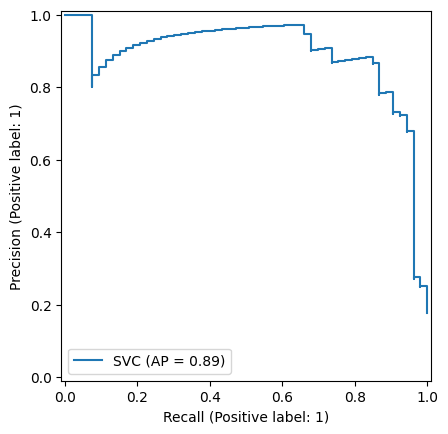

In [77]:
from sklearn.metrics import PrecisionRecallDisplay
svm_prc_disp = PrecisionRecallDisplay.from_estimator(svm, x_test, y_test)
plt.show()